<a href="https://colab.research.google.com/github/rulocastellanos/practice_data_science_ml/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and explore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape

(1025, 14)

In [6]:
print('Number of rows', data.shape[0])
print('Number of cols', data.shape[1])

Number of rows 1025
Number of cols 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Null values

In [8]:
#nno null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Check for duplicate data and drop them

In [9]:
data_dup = data.duplicated().any()
data_dup

True

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(302, 14)

Data statisstics

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Draw correlation matrix

<Axes: >

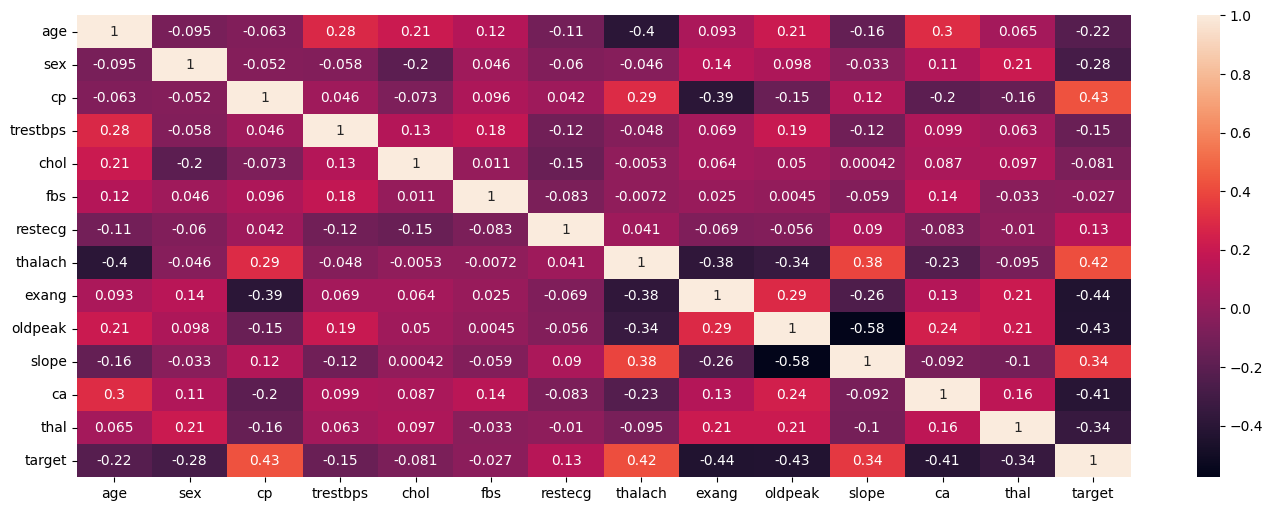

In [13]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot = True)

How many people had heart disease?

In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
data.target.value_counts()

,count
target,
1,164
0,138


<Axes: xlabel='target', ylabel='count'>

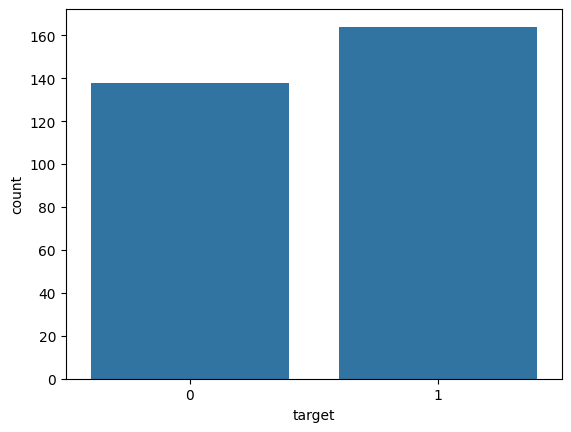

In [16]:
#create a graph
data['target'] = data['target'].astype('int')
sns.countplot(x='target', data=data)

How many people are men / women?

In [17]:
data['sex'].value_counts()

,count
sex,
1,206
0,96


<ipython-input-18-a383069f7310>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data, palette= palette)


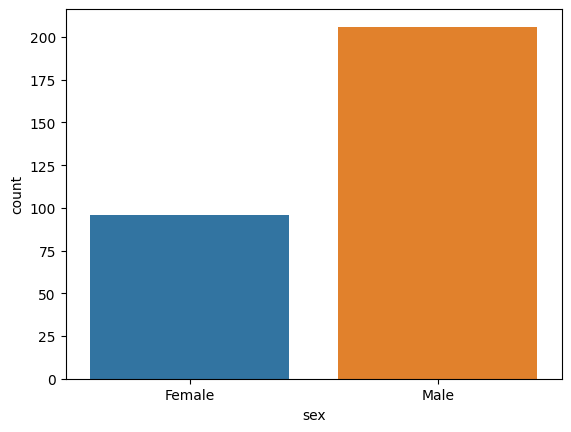

In [18]:
palette = ["#1f77b4", "#ff7f0e"]
data['sex'] = data['sex'].astype('int')
sns.countplot(x='sex', data=data, palette= palette)
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

Gender distribution according to target

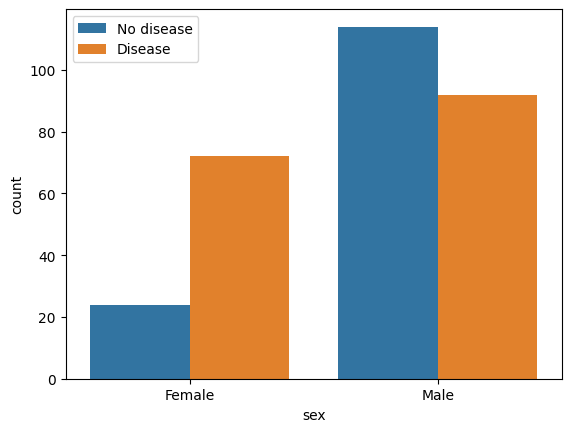

In [19]:
sns.countplot(x='sex', hue='target', data = data)
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(['No disease', 'Disease'])
plt.show()

Check age distribution

<ipython-input-20-5295ebea99ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


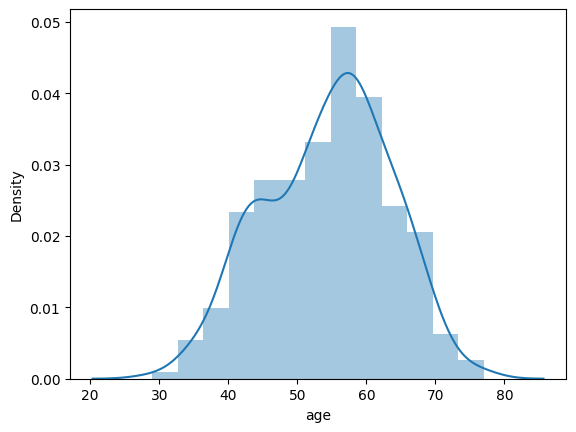

In [20]:
sns.distplot(data.age)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

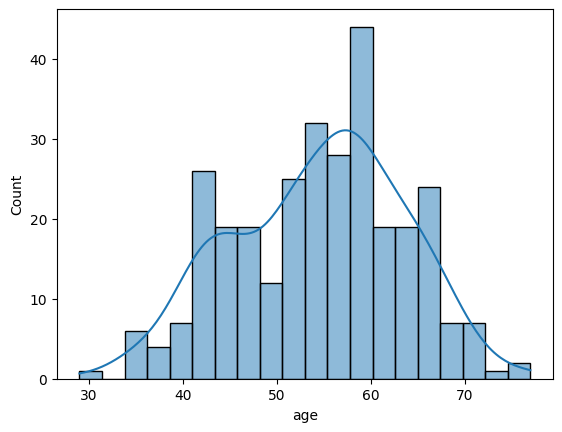

In [21]:
sns.histplot(data.age, kde=True, bins = 20)

Check chest type

<ipython-input-22-306b2ad44bd2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=data, palette= palette, order = order)
<ipython-input-22-306b2ad44bd2>:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x='cp', data=data, palette= palette, order = order)


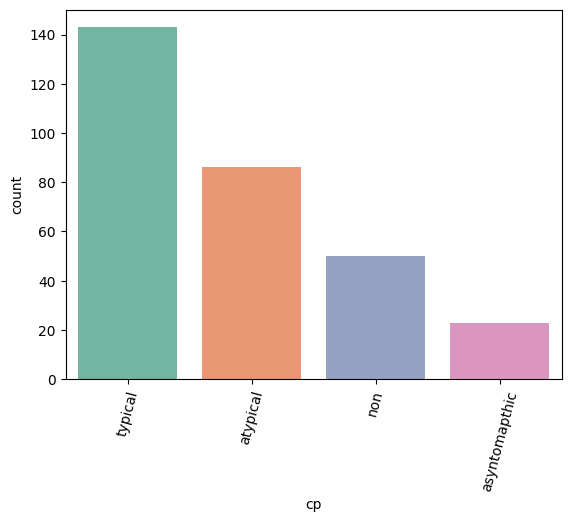

Index([0, 2, 1, 3], dtype='int64', name='cp')


In [22]:
palette = sns.color_palette("Set2")
data.cp = data.cp.astype('int')
order = data['cp'].value_counts().index
sns.countplot(x='cp', data=data, palette= palette, order = order)
plt.xticks([0,1,2,3], ["typical",
                       "atypical",
                       "non",
                       "asyntomapthic"],
           rotation = 75)
plt.show()
print(order)

CP and target graph

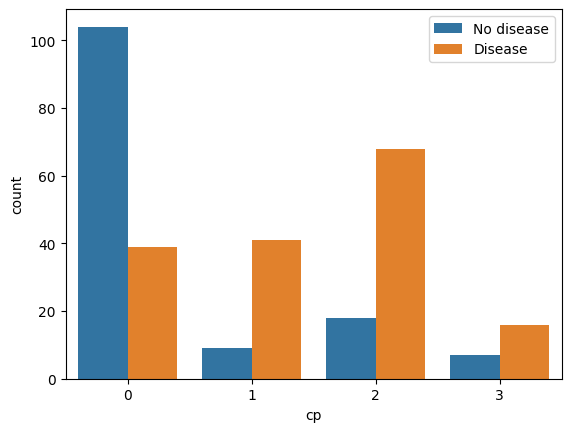

In [23]:
sns.countplot(x = 'cp',
              hue = 'target',
              data = data)
plt.legend(['No disease', 'Disease'])
plt.show()

Show fasting blood sugar districbution accordding to target

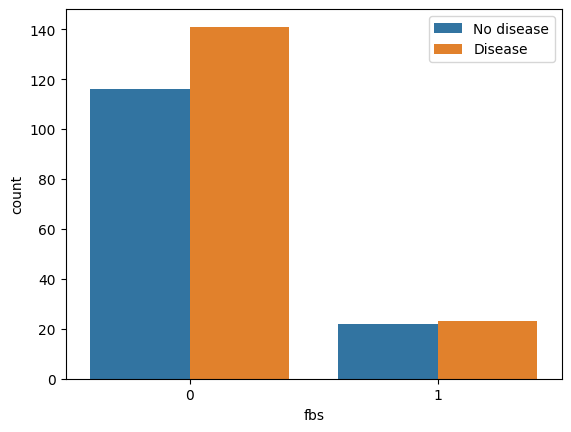

In [24]:
sns.countplot(x = 'fbs',
              hue = 'target',
              data = data)
plt.legend(['No disease', 'Disease'])
plt.show()

Check resting blood preassure distribution

In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

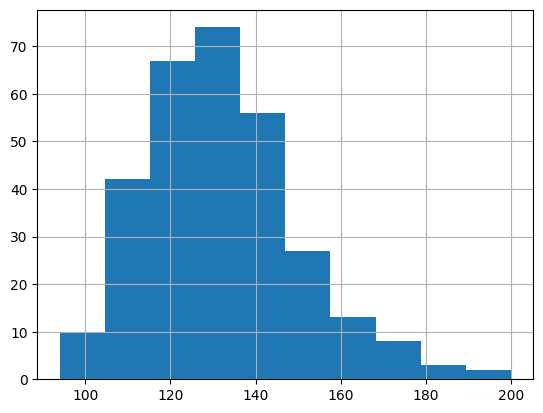

In [26]:
data['trestbps'].hist()
plt.show()

Check resting blood preassure distribution by sex

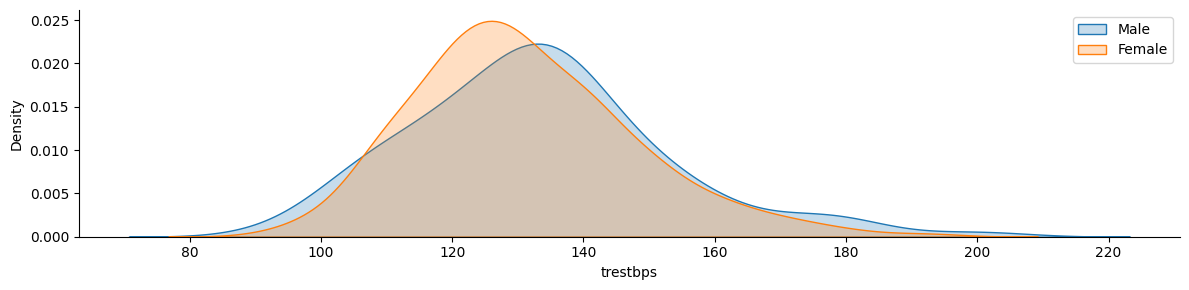

In [27]:
g = sns.FacetGrid(data, hue = 'sex', aspect = 4)
g.map(sns.kdeplot, 'trestbps', fill = True)
plt.legend(labels = ['Male', 'Female'])
plt.show()

Distribution of cholesterol

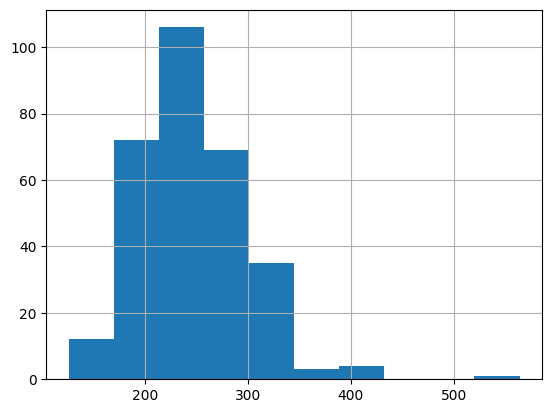

In [28]:
data.chol.hist()
plt.show()

Plot continious variables

In [29]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
cate_val = []
cont_val = []

for column in data.columns:
  if data[column].nunique() <= 10:
    cate_val.append(column)
  cont_val.append(column)

print('cate_val =', cate_val)
print('cont_val =', cont_val)

cate_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
cont_val = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [31]:
cont_val = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ]

In [32]:
len(cate_val)

9

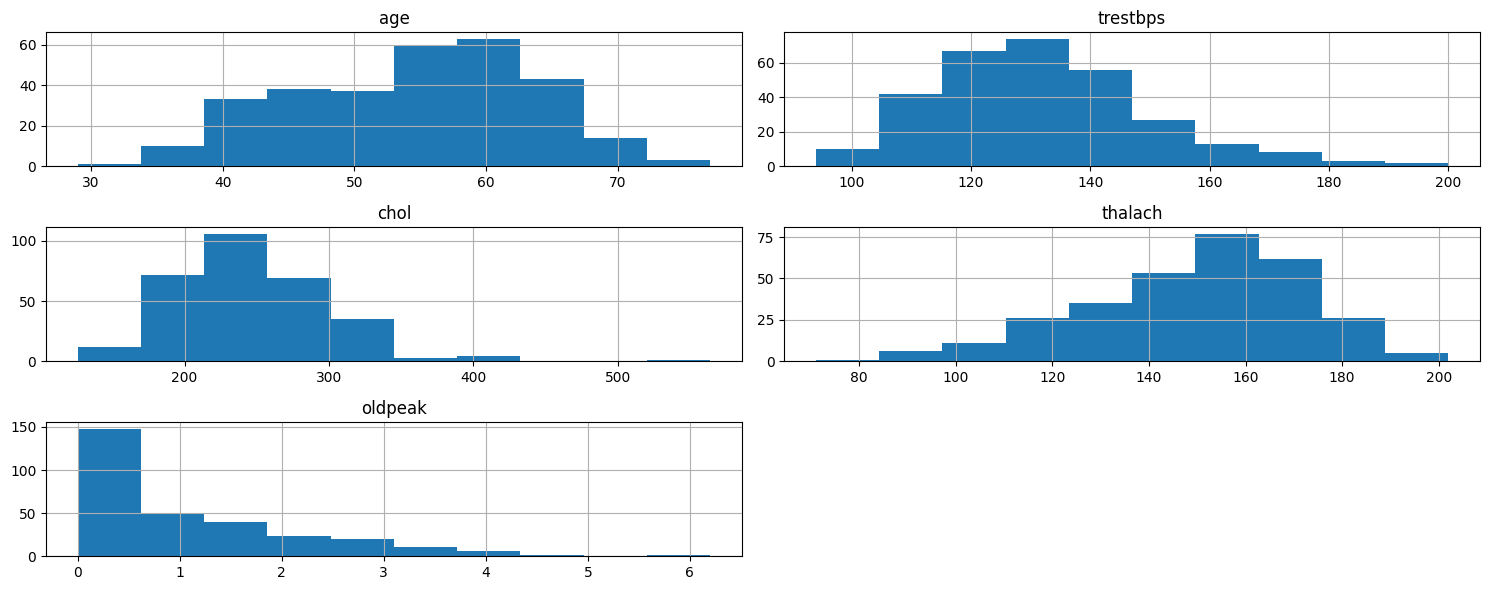

In [33]:
data.hist(cont_val, figsize = (15,6))
plt.tight_layout()
plt.show()

# Machine learning section

In [34]:
data_dup = data.duplicated().any()
data_dup

False

Encoding categorical data

In [35]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [36]:
data['cp'].unique()

array([0, 1, 2, 3])

In [37]:
#remove the binomial ones
cate_val.remove('sex')
cate_val.remove('target')

In [38]:
#create dummies
#rremove the first column of dummies
data = pd.get_dummies(data, columns=cate_val, drop_first=True)
dummy_columns = data.columns.difference(cate_val)  # Get the dummy variable columns
data[dummy_columns] = data[dummy_columns].astype(int)

In [39]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Feauture scaling

This allows us to have the feautures in the same scale

This is because the distance needs to be the same

We are only doing this in the continious values

In [40]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [43]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.216620,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [44]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.216620,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting the dataset in test and train

In [45]:
X = data.drop('target', axis = 1)
y = data['target']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state = 42)

# ML Models

In [48]:
from sklearn.linear_model import LogisticRegression

In [51]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred1 = log.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

# SVC

In [57]:
from sklearn import svm

In [58]:
svm = svm.SVC()

In [59]:
svm.fit(X_train, y_train)

SVC()

In [60]:
y_pred2 = svm.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

# KNN Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred3 = knn.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [67]:
score = []

for k in range (1,40):
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))

score

[0.7377049180327869,
 0.7868852459016393,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7868852459016393,
 0.7377049180327869,
 0.7868852459016393,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.8032786885245902,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7049180327868853,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361]

In [69]:
knn = KNeighborsClassifier(n_neighbors= 16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = (accuracy_score(y_test, y_pred))
score

0.8032786885245902

# Non linear ML algorithms

For this we do not requiere scaled data.

In [70]:
# load again the data

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/heart.csv')

In [71]:
data = data.drop_duplicates()

In [72]:
X = data.drop('target', axis = 1)

In [73]:
y = data['target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state = 42)

# Decision tree classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred4 = dt.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred4)

0.7540983606557377

# Random forest classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier()

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred5 = rf.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred5)

0.8360655737704918

# Gradient Boosting Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbc = GradientBoostingClassifier()

In [88]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [89]:
y_pred6 = gbc.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [92]:
final_data = pd.DataFrame(
    {'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
     'Accuracy': [accuracy_score(y_test, y_pred1),
                  accuracy_score(y_test, y_pred2),
                  accuracy_score(y_test, y_pred3),
                  accuracy_score(y_test, y_pred4),
                  accuracy_score(y_test, y_pred5),
                  accuracy_score(y_test, y_pred6)]}
)
final_data

,Models,Accuracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.836066
5,GB,0.803279


In [93]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

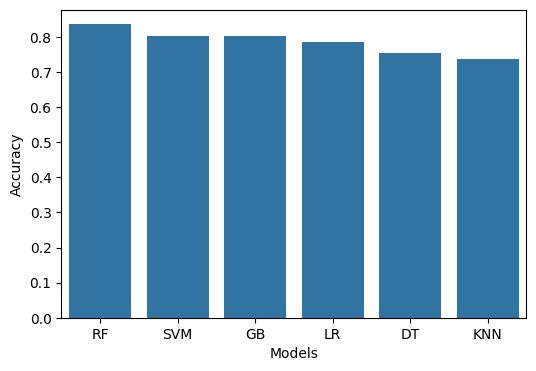

In [99]:
# Set the figure size
plt.figure(figsize=(6, 4))

final_data_sorted = final_data.sort_values(by='Accuracy', ascending=False)

# Create the bar plot with a specific color palette
sns.barplot(x='Models', y='Accuracy', data=final_data_sorted)

# Train on the complete data

In [100]:
X = data.drop('target', axis = 1)
y = data['target']

In [101]:
rf = RandomForestClassifier()

In [103]:
rf.fit(X,y)

RandomForestClassifier()